<a href="https://www.kaggle.com/code/niramay/diabetes-predictor?scriptVersionId=105331603" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
all_data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
all_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Target Variable distribution 
all_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


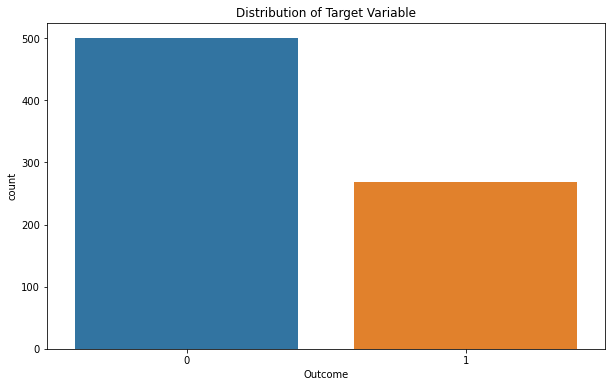

In [4]:
plt.figure(figsize = (10,6))
sns.countplot('Outcome',data=all_data).set_title('Distribution of Target Variable')
plt.show()

The target variable(Outcome) has an imbalanced distribution of independent variables. This might influence the performance of our model negatively.

In [5]:
# Examine missing values

all_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We do not have any missing values in this dataset which means we do not need any imputation before training the model

In [6]:
# Examining data types 
all_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

All our columns have integer values, except two,BMI and DiabetesPedigreeFunction which are both float.

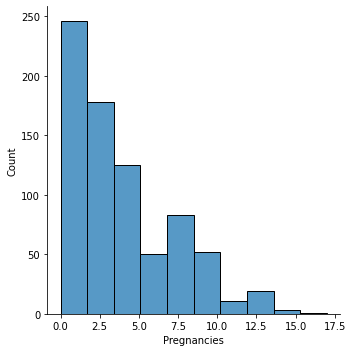

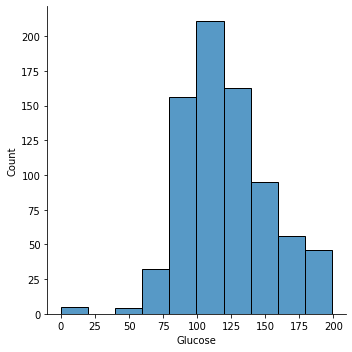

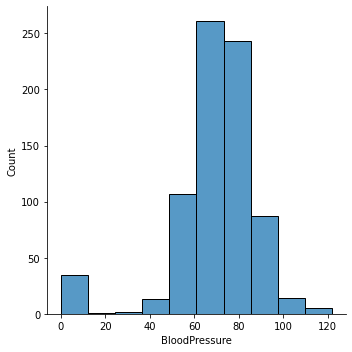

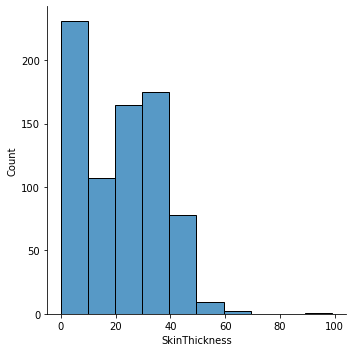

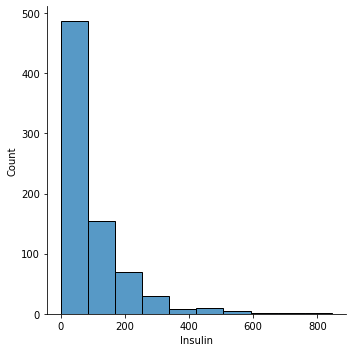

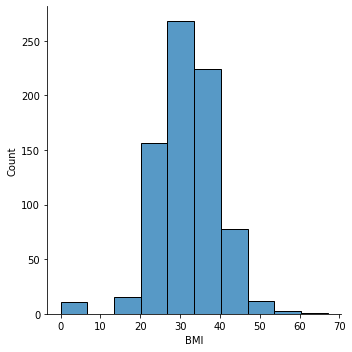

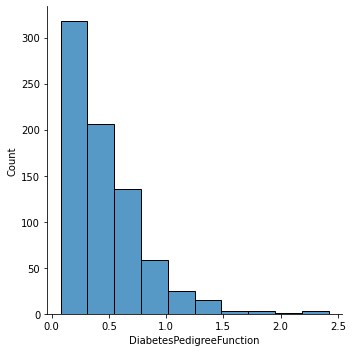

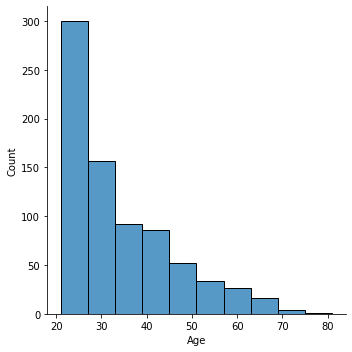

In [7]:
# Examining data distributions 
features = np.array(all_data.columns)
features = np.delete(features, -1)
for feature in features:
    sns.displot(data=all_data, x=feature, kind = 'hist',bins = 10)

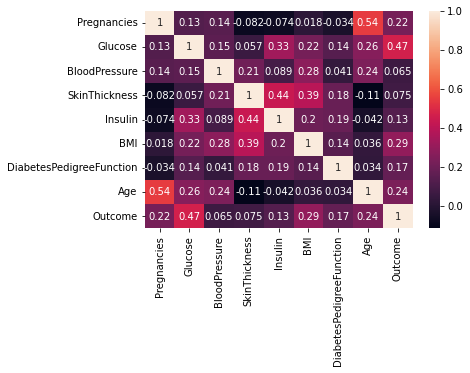

In [8]:
# Examining data intercorrelations
correlation_matrix = all_data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

After plotting a heatmap of the correlation matrix, we can observe that Glucose has the highest correlation with Outcome among all the features.

Now lets do some preprocessing before we make train and test splits so that the data is ready for training the logistic regression model.

In [9]:
# removing outliers using z-scores
z_scores = np.abs(stats.zscore(all_data))
z_scores

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,0.692891,0.204013,0.468492,1.425995,1.365896
1,0.844885,1.123396,0.160546,0.530902,0.692891,0.684422,0.365061,0.190672,0.732120
2,1.233880,1.943724,0.263941,1.288212,0.692891,1.103255,0.604397,0.105584,1.365896
3,0.844885,0.998208,0.160546,0.154533,0.123302,0.494043,0.920763,1.041549,0.732120
4,1.141852,0.504055,1.504687,0.907270,0.765836,1.409746,5.484909,0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,0.622642,0.356432,1.722735,0.870031,0.115169,0.908682,2.532136,0.732120
764,0.547919,0.034598,0.046245,0.405445,0.692891,0.610154,0.398282,0.531023,0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,0.735190,0.685193,0.275760,0.732120
766,0.844885,0.159787,0.470732,1.288212,0.692891,0.240205,0.371101,1.170732,1.365896


In [10]:
# before removing outliers
all_data.shape

(768, 9)

In [11]:
# after removing outliers
all_data = all_data[(z_scores < 3.5).all(axis=1)]
all_data.shape


(701, 9)

In [12]:
# scaling the data since all the features do not have the same units

X = all_data[features]
scaler = StandardScaler()
columns = np.array(all_data.keys())

X = all_data[features]
scaledX = scaler.fit_transform(X)
all_data[features] = scaledX
all_data

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.634727,0.910119,-0.031767,0.920086,-0.787811,0.201105,0.587367,1.454315,1
1,-0.866432,-1.189640,-0.519400,0.528715,-0.787811,-0.850718,-0.363520,-0.189302,0
2,1.235190,2.076651,-0.681945,-1.362915,-0.787811,-1.346578,0.742403,-0.102795,1
3,-0.866432,-1.056322,-0.519400,0.137343,0.190812,-0.625328,-0.997444,-1.054363,0
5,0.334495,-0.156425,0.130778,-1.362915,-0.787811,-1.000979,-0.880305,-0.275808,0
...,...,...,...,...,...,...,...,...,...
763,1.835654,-0.656368,0.293322,1.768058,1.086147,0.095922,-0.983663,2.578894,0
764,-0.566200,0.043552,-0.194311,0.398257,-0.787811,0.681938,-0.401417,-0.535326,0
765,0.334495,0.010222,-0.031767,0.137343,0.378207,-0.910822,-0.728715,-0.275808,0
766,-0.866432,0.176870,-1.007034,-1.362915,-0.787811,-0.324807,-0.370410,1.194796,1


In [13]:
X = all_data[features]
Y = all_data[['Outcome']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 13)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((490, 8), (211, 8), (490, 1), (211, 1))

In [14]:
regressor = LogisticRegression()
regressor.fit(X_train,Y_train)

predictions = regressor.predict(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print('Precision:',precision_score(Y_test, predictions))

Precision: 0.6666666666666666


In [16]:
print('Accuracy:', accuracy_score(Y_test, predictions))

Accuracy: 0.7962085308056872


In [17]:
print('Recall:', recall_score(Y_test, predictions))

Recall: 0.65625


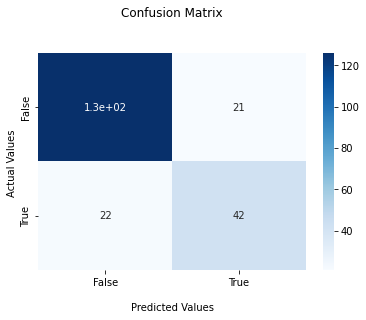

In [18]:
# display the confusion matrix

conf_matrix = confusion_matrix(Y_test,predictions)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

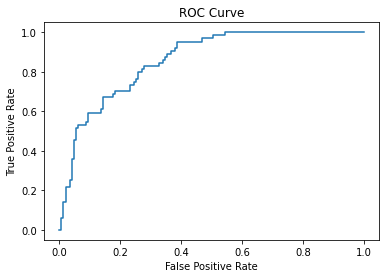

In [19]:
prediction_probabilities = regressor.predict_proba(X_test)[::,1]
fpr, tpr,_ = roc_curve(Y_test, prediction_probabilities)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
auc = roc_auc_score(Y_test,prediction_probabilities)
print('ROC AUC:', auc)

ROC AUC: 0.8594812925170068


In [21]:
# feature selection 

mod = sm.Logit(Y,X)
res = mod.fit()

print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.528544
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.170     
Dependent Variable:   Outcome            AIC:                757.0194  
Date:                 2022-09-10 08:02   BIC:                793.4394  
No. Observations:     701                Log-Likelihood:     -370.51   
Df Model:             7                  LL-Null:            -446.43   
Df Residuals:         693                LLR p-value:        1.6715e-29
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------------
Pregnancies               0.3632   0.1114  3.2594 0.0011  0.144

In the above result from the statsmodel summary, the features that have the most impact in our model have a p-value less than 0.05. We select just those features to re-build another model since including the features that do not have a significant impact on the Outcome affect our model negatively. 

In [22]:
selected_features = ['Pregnancies', 'Glucose','BMI', 'DiabetesPedigreeFunction']
X_ = all_data[selected_features]
Y_ = Y 



In [23]:
X__train, X__test, Y__train, Y__test = train_test_split(X_,Y_,test_size = 0.3,random_state = 13)
X__train.shape, X__test.shape, Y__train.shape, Y__test.shape

((490, 4), (211, 4), (490, 1), (211, 1))

In [24]:
regressor_ = LogisticRegression()
regressor_.fit(X__train, Y__train)
predictions_ = regressor_.predict(X__test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print('Precision score after feature selection:',precision_score(Y__test, predictions_))

Precision score after feature selection: 0.6666666666666666


In [26]:
print('Accuracy score after feature selection:',accuracy_score(Y__test, predictions_))

Accuracy score after feature selection: 0.7914691943127962


In [27]:
print('Recall score after feature selection:', recall_score(Y__test, predictions_))

Recall score after feature selection: 0.625


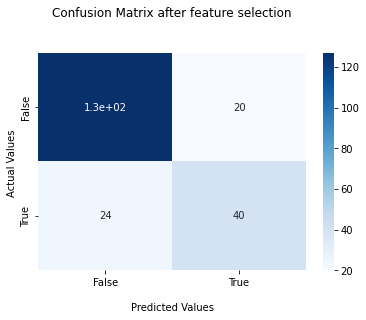

In [28]:
confusion_matrix = confusion_matrix(Y__test,predictions_)

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix after feature selection\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

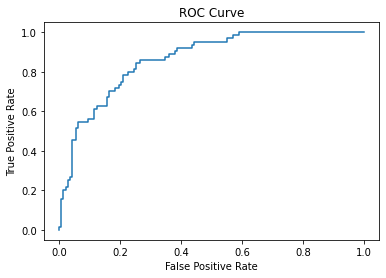

In [29]:
prediction_probabilities_ = regressor_.predict_proba(X__test)[::,1]
fpr, tpr,_ = roc_curve(Y__test, prediction_probabilities_)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [30]:
auc_ = roc_auc_score(Y__test,prediction_probabilities_)
print('ROC AUC after feature selection:', auc_)

ROC AUC after feature selection: 0.8638392857142857


Assessment of the new model:

The precision of the new model remained the same, while the accuracy and recall slightly reduced.
The accuracy should've increased in an ideal scenario but since we were able to reduce the dimensionality and complexity of the model and not sacrifice a lot of accuracy, its still an improvement over the previous model. The newer model will lead to a fater model training time and convergence.

However, ROC AUC increased slightly which is a good thing an means that the true positive rate of our model has increased. Higher the AUC, the better the model is at predicting a '0 Outcome' as 0 and a '1 Outcome' as 1